# Week 11 Lab Assignment: Text Analytics and Model Performance

### Objective
In this lab, you will explore text analytics and evaluate the performance of predictive models using various metrics. The lab focuses on text data cleaning, building models, and assessing their performance with accuracy, precision, recall, F1 score, and ROC-AUC.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: Scikit-learn, Pandas, Numpy, Matplotlib, Seaborn, and NLTK.

In [8]:
# Install necessary packages
%pip install scikit-learn pandas numpy matplotlib seaborn nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, text processing, modeling, and visualization.


In [9]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3. Load and Explore Text Data
**Objective:** Gain a preliminary understanding of the text dataset to be used for analysis.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.

In [10]:
# Load the dataset
df = pd.read_csv('text_data.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

                                                text     label
0  The product quality is really good and I am sa...  positive
1  I had a terrible experience with the customer ...  negative
2  The delivery was fast and the packaging was ex...  positive
3  The website was very confusing and hard to nav...  negative
4  I love the variety of products available and t...  positive
text     0
label    0
dtype: int64


### 4. Text Data Cleaning
**Objective:** Prepare the text data by cleaning and tokenizing it.

**Tasks:**
1. **Remove Stop Words:** Use NLTK to remove common stop words from the text.
2. **Tokenization:** Split text into individual words (tokens).
3. **Vectorization:** Convert text into numerical format using TF-IDF.

In [11]:
# Text cleaning and tokenization
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = text.lower().split()
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)
print(df['cleaned_text'].head())

0      product quality really good satisfied purchase.
1    terrible experience customer service, disappoi...
2                   delivery fast packaging excellent.
3                     website confusing hard navigate.
4    love variety products available prices reasona...
Name: cleaned_text, dtype: object


### 5. Split Data and Apply TF-IDF
**Objective:** Convert the cleaned text data into numerical format and split it into training and testing sets.

**Tasks:**
1. **Apply TF-IDF Vectorization:** Use TfidfVectorizer to convert text to numerical features.
2. **Split Data:** Split the data into training and testing sets.

In [12]:
# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']  # Assuming 'label' is the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (55, 175)
Test set size: (24, 175)


### 6. Build and Evaluate Predictive Models
**Objective:** Train different models and evaluate their performance using various metrics.

**Tasks:**
1. **Train Logistic Regression and Naive Bayes Models:** Use training data to train the models.
2. **Evaluate Model Performance:** Use accuracy, precision, recall, F1 score, and ROC-AUC to evaluate the models.

In [13]:
# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Evaluate model performance
print('Logistic Regression Classification Report')
print(classification_report(y_test, lr_pred))

print('Naive Bayes Classification Report')
print(classification_report(y_test, nb_pred))

Logistic Regression Classification Report
              precision    recall  f1-score   support

    negative       1.00      0.50      0.67        12
    positive       0.67      1.00      0.80        12

    accuracy                           0.75        24
   macro avg       0.83      0.75      0.73        24
weighted avg       0.83      0.75      0.73        24

Naive Bayes Classification Report
              precision    recall  f1-score   support

    negative       1.00      0.58      0.74        12
    positive       0.71      1.00      0.83        12

    accuracy                           0.79        24
   macro avg       0.85      0.79      0.78        24
weighted avg       0.85      0.79      0.78        24



### 7. ROC-AUC Analysis
**Objective:** Plot ROC curves for different models and calculate the AUC to compare their performance.

**Tasks:**
1. **Plot ROC Curves:** Visualize the ROC curves for Logistic Regression and Naive Bayes models.
2. **Calculate AUC:** Compute the AUC for each model and compare.

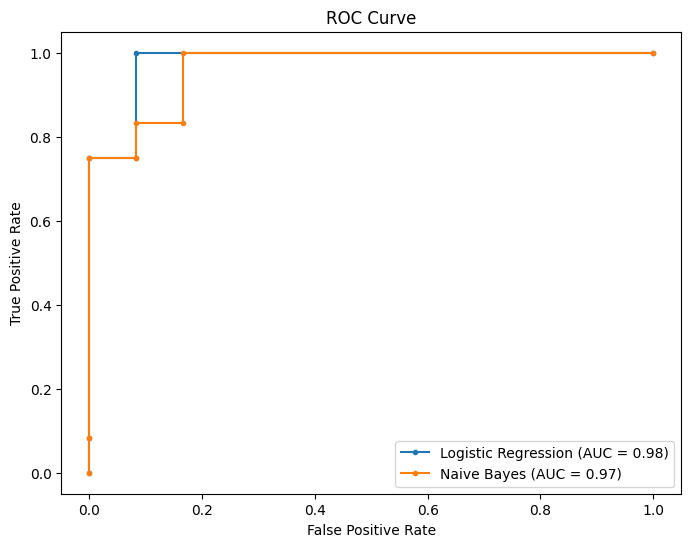

{'Logistic Regression': {'Prediction': 'positive', 'Probability': 0.5796656197628384}, 'Naive Bayes': {'Prediction': 'positive', 'Probability': 0.6409719392328579}}


In [16]:
# ROC-AUC for Logistic Regression
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# # ROC-AUC for Naive Bayes
# nb_probs = nb_model.predict_proba(X_test)[:, 1]
# nb_auc = roc_auc_score(y_test, nb_probs)
# nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label='positive')

# ROC-AUC for Naive Bayes
nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_auc = roc_auc_score(y_test, nb_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label='positive')

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, marker='.', label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Function to evaluate model performance
# Function to predict sentiment
def predict_sentiment(text):
    # Clean the text
    cleaned_text = clean_text(text)
    
    # Transform the text using TF-IDF
    text_tfidf = tfidf.transform([cleaned_text]).toarray()
    
    # Predict using Logistic Regression
    lr_prediction = lr_model.predict(text_tfidf)
    lr_prob = lr_model.predict_proba(text_tfidf)[:, 1]
    
    # Predict using Naive Bayes
    nb_prediction = nb_model.predict(text_tfidf)
    nb_prob = nb_model.predict_proba(text_tfidf)[:, 1]
    
    return {
        'Logistic Regression': {'Prediction': lr_prediction[0], 'Probability': lr_prob[0]},
        'Naive Bayes': {'Prediction': nb_prediction[0], 'Probability': nb_prob[0]}
    }

# Test the function with a random string
random_string = "The product is amazing and I love it!"
result = predict_sentiment(random_string)
print(result)


### 8. Summary and Discussion
**Objective:** Reflect on the performance of different models and discuss their implications in the context of text analytics.

**Tasks:**
1. **Compare Model Performance:** Discuss the results from Logistic Regression and Naive Bayes models, including their ROC-AUC scores.
2. **Business Implications:** Describe how evaluating model performance can help improve decision-making in text analytics applications.

### 9. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code, visualizations, and model evaluations.
- A brief report (1-2 paragraphs) summarizing the findings, comparing model performance, and discussing the use of evaluation metrics in text analytics.

**Deadline:** Submit your completed notebook and report to the course portal by the end of class.